In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

abstract-- Conjunto de datos de aerolíneas
El conjunto de datos de aerolíneas proporciona una fuente valiosa de información para analizar y optimizar las operaciones de las aerolíneas y mejorar la experiencia del cliente. Este conjunto de datos abarca una amplia gama de variables, incluyendo datos demográficos de los pasajeros, información sobre rutas de vuelo y estados de vuelo. A continuación, se resumen los aspectos más destacados de este conjunto de datos:

Información de Pasajeros:

ID de Pasajero: Un identificador único para cada pasajero. Nombre y Apellido: Proporciona los nombres completos de los pasajeros. Género y Edad: Permite analizar las preferencias y características demográficas de los pasajeros. Nacionalidad: Ofrece información sobre la nacionalidad de los pasajeros. Información de Aeropuertos:

Nombre del Aeropuerto: Identifica el aeropuerto de embarque de los pasajeros. Código de País del Aeropuerto: Proporciona el código de país donde se encuentra el aeropuerto. Nombre del País y Continente del Aeropuerto: Estos campos ayudan a contextualizar la ubicación del aeropuerto. Información de Vuelos:

Continentes Involucrados en la Ruta: Muestra los continentes que están relacionados con la ruta de vuelo, lo que es esencial para el análisis de rutas internacionales. Fecha de Salida: Permite el análisis de patrones de vuelo y puntualidad en función de la fecha. Aeropuerto de Llegada: Identifica el destino del vuelo. Nombre del Piloto: Proporciona información sobre los pilotos responsables de operar los vuelos. Estado del Vuelo: Indica el estado actual del vuelo, incluyendo si es puntual, retrasado o cancelado. Este conjunto de datos es una valiosa herramienta para las aerolíneas que desean mejorar sus operaciones y la satisfacción del cliente. Al analizar los datos de retrasos, cancelaciones y puntualidad, las aerolíneas pueden identificar tendencias y patrones críticos. Estas tendencias pueden ayudar a las aerolíneas a tomar decisiones informadas, como ajustar horarios, rutas o estrategias de gestión de vuelos para garantizar la puntualidad y minimizar interrupciones, lo que, a su vez, mejora la experiencia del cliente y la eficiencia operativa.

En resumen, este conjunto de datos de aerolíneas es una valiosa fuente de información que puede ayudar a las aerolíneas a tomar decisiones estratégicas basadas en datos sólidos, lo que resulta en una mejora significativa en la calidad de los servicios y la puntualidad de los vuelos.

VARIABLES

ID de pasajero : identificador único para cada pasajero
Nombre - Nombre del pasajero
Apellido - Apellido del pasajero
Género - Género del pasajero
Edad - Edad del pasajero
Nacionalidad - Nacionalidad del pasajero
Nombre del Aeropuerto - Nombre del aeropuerto donde abordó el pasajero
Código de país del aeropuerto : código de país de la ubicación del aeropuerto
Nombre del país : nombre del país en el que está ubicado el aeropuerto.
Continente del aeropuerto : continente donde está situado el aeropuerto.
Continentes - Continentes involucrados en la ruta del vuelo.
Fecha de salida - Fecha de salida del vuelo
Aeropuerto de llegada - Aeropuerto de destino del vuelo
Nombre del piloto : nombre del piloto que opera el vuelo.
Estado del vuelo : estado actual del vuelo (p. ej., puntual, retrasado, cancelado)

In [2]:
df = pd.read_csv('C:/Users/gasto/Documents/Airline Dataset/Airline Dataset.csv')
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [3]:
df.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [4]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Eliminar columnas que no se usarán en el modelo
columns_to_drop = ['Passenger ID', 'First Name', 'Last Name', 'Continents','Airport Continent'  ,'Pilot Name', 'Country Name', 'Arrival Airport']
df = df.drop(columns=columns_to_drop)


# Eliminar la columna original 'Departure Date'
df = df.drop(columns=['Departure Date'])

# Codificación de variables categóricas
df_encoded = pd.get_dummies(df, columns=['Gender', 'Nationality', 'Airport Country Code','Airport Name' ])

# Separar features y target
X = df_encoded.drop(columns=['Flight Status'])
y = df_encoded['Flight Status']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Crear y entrenar modelo de Regresión Logística
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)

# Predecir y evaluar el modelo
y_pred_logistic = model_logistic.predict(X_test)
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

C:\Users\gasto\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

   Cancelled       0.33      0.34      0.34      6446
     Delayed       0.34      0.35      0.35      6655
     On Time       0.34      0.32      0.33      6623

    accuracy                           0.34     19724
   macro avg       0.34      0.34      0.34     19724
weighted avg       0.34      0.34      0.34     19724



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar modelo Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Predecir y evaluar el modelo de Random Forest
y_pred_rf = model_rf.predict(X_test)
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Classification Report - Random Forest:
              precision    recall  f1-score   support

   Cancelled       0.33      0.37      0.35      6446
     Delayed       0.33      0.32      0.33      6655
     On Time       0.34      0.32      0.33      6623

    accuracy                           0.33     19724
   macro avg       0.33      0.33      0.33     19724
weighted avg       0.33      0.33      0.33     19724



**Ambos modelos parecen tener resultados similares en cuanto a precisión, recall y F1-Score para las clases. La precisión promedio y el F1-Score promedio son del 34% para la Regresión Logística y del 33% para Random Forest. Ambos modelos tienen un mal desempeño  y  necesitan ajustes o características adicionales para mejorar su rendimiento.**

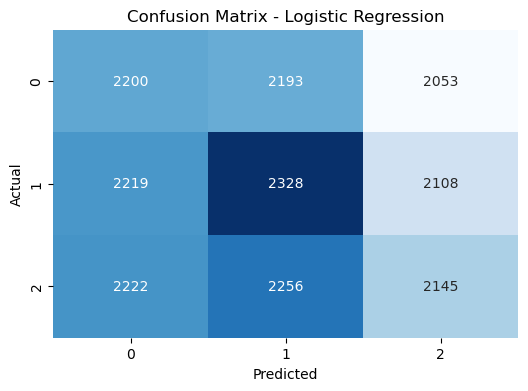

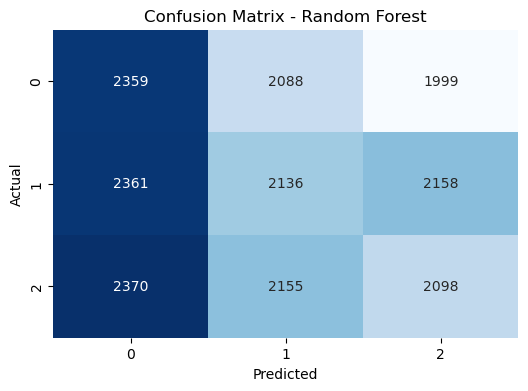

NameError: name 'y_pred_knn' is not defined

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Matriz de confusión - Regresión Logística
plot_confusion_matrix(y_test, y_pred_logistic, 'Confusion Matrix - Logistic Regression')

# Matriz de confusión - Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')
# Matriz de confusión - K-Nearest Neighbors
plot_confusion_matrix(y_test, y_pred_knn, 'Confusion Matrix - K-Nearest Neighbors')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Preprocesamiento: Codificar variables categóricas y estandarizar numéricas
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_encoded)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Seleccionamos 5 vecinos, puedes ajustar este valor
knn.fit(X_train, y_train)

# Predecir y evaluar el modelo KNN
y_pred_knn = knn.predict(X_test)
print("Classification Report - K-Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

|      Model          | Precision (Cancelled) | Precision (Delayed) | Precision (On Time) | Recall (Cancelled) | Recall (Delayed) | Recall (On Time) | F1-score (Cancelled) | F1-score (Delayed) | F1-score (On Time) | Accuracy |
|---------------------|-----------------------|---------------------|---------------------|--------------------|------------------|------------------|----------------------|--------------------|--------------------|----------|
| Logistic Regression |         0.34          |        0.35         |         0.34         |        0.35        |       0.34       |       0.33       |         0.34         |        0.35        |         0.34       |   0.34   |
| Random Forest       |         0.33          |        0.34         |         0.34         |        0.35        |       0.33       |       0.33       |         0.34         |        0.33        |         0.33       |   0.33   |
| K-Nearest Neighbors |         0.33          |        0.34         |         0.34         |        0.47        |       0.32       |       0.21       |         0.39         |        0.33        |         0.26       |   0.33   |


**Los tres algoritmos deben ser mejorados , con mejores técnicas u obtener una mayor cantidad de datos.**